In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from scipy import constants

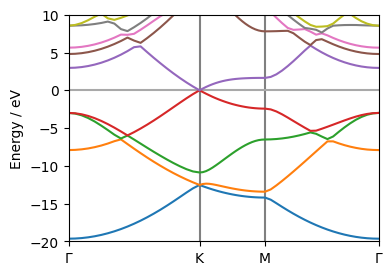

In [2]:
bands = list()

with open("graphene.band.gnu") as f:
    lines = map(str.strip, f.read().split("\n"))

fermi_energy = -0.4572

band = list()
for line in lines:
    if len(line) > 0:
        band.append([float(ns) for ns in re.split(" +", line)])
    elif len(band) > 0:
        bands.append(band)
        band = list()

bands = np.array(bands)
bands[:, :, 1] = bands[:, :, 1] - fermi_energy

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
for band in bands:
    ax.plot(band[:, 0], band[:, 1])

k = 2 / 3
m = 1
gm = 0, bands[:, :, 0].max()

ax.set(
    xlim=(gm[0], gm[1]),
    ylim=(-20, 10),
    ylabel="Energy / eV",
    xticks=[gm[0], k, m, gm[1]],
    xticklabels=["Γ", "K", "M", "Γ"],
)

ax.vlines([k, m], *ax.get_ylim(), ls="-", color="gray")
ax.hlines([0], *ax.get_xlim(), ls="-", color="darkgray")

fig.savefig("graphene_band.png")